<a href="https://colab.research.google.com/github/rippedtuco/image_processing/blob/main/Gaussian_smoothing_%2B_Sobel_Operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving building.png to building (1).png


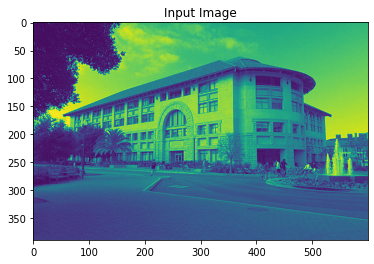

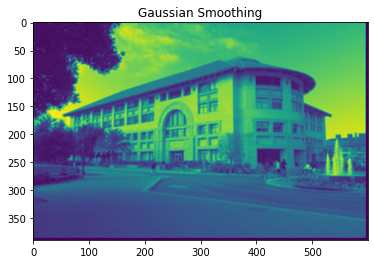

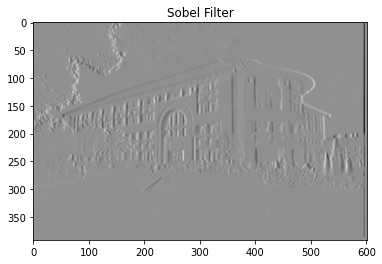

In [2]:
import sys
from google.colab import files
import matplotlib.image as mpimg
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st


def convolve2D(image, kernel, pad=0, step=1):

    # Gathering the dimensions of the Kernel and the Image
    knDimX = kernel.shape[0]
    knDimY = kernel.shape[1]
    imgDimX = image.shape[0]
    imgDimY = image.shape[1]

    # Creating an empty output matrix which will be used to represent the convolution o/p.
    opX = int(((imgDimX - knDimX + 2 * pad) / step) + 1)
    opY = int(((imgDimY - knDimY + 2 * pad) / step) + 1)
    output = np.zeros((opX, opY))

    # Apply Equal pad to All Sides
    if pad != 0:
        imgPad = np.zeros((image.shape[0] + pad*2, image.shape[1] + pad*2))
        imgPad[int(pad):int(-1 * pad), int(pad):int(-1 * pad)] = image
    else:
        imgPad = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - knDimY:
            break
        # Only Convolve if y has gone down by the specified step
        if y % step == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - knDimX:
                    break
                try:
                    # Only Convolve if x has moved by the specified step
                    if x % step == 0:
                        output[x, y] = (kernel * imgPad[x: x + knDimX, y: y + knDimY]).sum()
                except:
                    break

    return output

def gk(klen=21, sd=3):

    x = np.linspace(-sd, sd, klen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()


if __name__ == '__main__':

    uploaded=files.upload()
    img = mpimg.imread('building.png')
    plt.imshow(img)
    plt.title("Input Image")
    plt.show()

    kernel = gk(5, 2.5)*273

    # Convolve and Save Output
    output = convolve2D(img, kernel, pad=2)
    plt.imshow(output)
    plt.title("Gaussian Smoothing")
    plt.show()

    kernel_sobel_1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    output_2 = convolve2D(output, kernel_sobel_1, pad=2)
    plt.imshow(output_2,cmap='gray')
    plt.title("Sobel Filter")
    plt.show()